### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

0    809
1    500
Name: survived, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

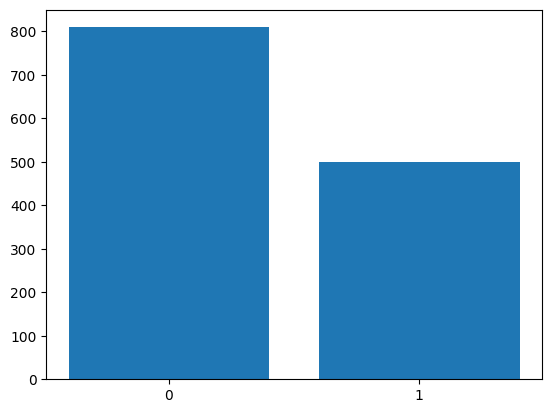

In [150]:
### write your code here. Load the dataset and plot (barplot) proportion of each class 
data = pd.read_csv('titanic.csv')
y = data['survived'].value_counts()
X = ['0', '1']
print(y)
plt.bar(X, y)
plt.show

#### Preprocess the data as it has been done in the lab, feel free to adapt

In [151]:
data = data.drop(['name'], axis = 1)
X = data
y = data['survived']

In [152]:
#### preprocess the data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X)
X = pd.DataFrame(imputer.transform(X), columns=X.columns)

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(X[f_names])
new_feats = encoder.transform(X[f_names])
new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(f_names))
new_df = pd.concat([X, new_cols], axis=1)    
new_df.drop(f_names, axis=1, inplace=True)

scaler = MinMaxScaler()
scaler.fit(new_df)
X = pd.DataFrame(scaler.transform(new_df), columns=new_df.columns)
X

/home/dale/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,0.0,0.361142,0.000,0.000000,0.412503,0.0,0.0,1.0
1,1.0,0.0,0.009395,0.125,0.222222,0.295806,1.0,0.0,1.0
2,0.0,0.0,0.022924,0.125,0.222222,0.295806,0.0,0.0,1.0
3,0.0,0.0,0.373669,0.125,0.222222,0.295806,1.0,0.0,1.0
4,0.0,0.0,0.311036,0.125,0.222222,0.295806,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1304,0.0,1.0,0.179506,0.125,0.000000,0.028213,0.0,0.0,0.0
1305,0.0,1.0,0.298509,0.125,0.000000,0.028213,0.0,0.0,0.0
1306,0.0,1.0,0.329826,0.000,0.000000,0.014102,1.0,0.0,0.0
1307,0.0,1.0,0.336089,0.000,0.000000,0.014102,1.0,0.0,0.0


## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

In [153]:
### write your code here 
# find and print the proportion of positive samples in data
l = len(y)
possitive = sum(y == 1)/l
print('% of positive samples in whole data:', possitive)
print('% of negative samples in whole data:', 1 - possitive)

% of positive samples in whole data: 0.3819709702062643
% of negative samples in whole data: 0.6180290297937356


In [154]:
pos_sample = X[X['survived'] == 1]
neg_sample = X[X['survived'] == 0]

sample_20 = pd.concat([pos_sample.sample(int(l*0.15)), neg_sample.sample(int(l*0.6))], axis=0)
X = sample_20.loc[:, 'pclass':]
y = sample_20.survived
x_train_20, x_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.3, stratify=y)

sample_30 = pd.concat([pos_sample.sample(int(l*0.24)), neg_sample.sample(int(l*0.56))], axis=0)
X = sample_30.loc[:, 'pclass':]
y = sample_30.survived
x_train_30, x_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=0.3, stratify=y)

sample_40 = pd.concat([pos_sample.sample(int(l*0.32)), neg_sample.sample(int(l*0.48))], axis=0)
X = sample_40.loc[:, 'pclass':]
y = sample_40.survived
x_train_40, x_test_40, y_train_40, y_test_40 = train_test_split(X, y, test_size=0.3, stratify=y)

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics

20% and 80%

In [156]:
acc, prec, recall = [], [], []


clf = LogisticRegression()
clf.fit(x_train_20, y_train_20)

y_pred_20 = clf.predict(x_test_20)

acc.append(accuracy_score(y_test_20, y_pred_20))
prec.append(precision_score(y_test_20, y_pred_20))
recall.append(recall_score(y_test_20, y_pred_20))

print(accuracy_score(y_test_20, y_pred_20))
print(precision_score(y_test_20, y_pred_20))
print(recall_score(y_test_20, y_pred_20))

0.8779661016949153
0.896551724137931
0.4406779661016949


In [157]:
clf.fit(x_train_30, y_train_30)

y_pred_30 = clf.predict(x_test_30)

acc.append(accuracy_score(y_test_30, y_pred_30))
prec.append(precision_score(y_test_30, y_pred_30))
recall.append(recall_score(y_test_30, y_pred_30))

print(accuracy_score(y_test_30, y_pred_30))
print(precision_score(y_test_30, y_pred_30))
print(recall_score(y_test_30, y_pred_30))

0.7777777777777778
0.6395348837209303
0.5851063829787234


In [158]:
clf.fit(x_train_40, y_train_40)

y_pred_40 = clf.predict(x_test_40)

acc.append(accuracy_score(y_test_40, y_pred_40))
prec.append(precision_score(y_test_40, y_pred_40))
recall.append(recall_score(y_test_40, y_pred_40))

print(accuracy_score(y_test_40, y_pred_40))
print(precision_score(y_test_40, y_pred_40))
print(recall_score(y_test_40, y_pred_40))

0.7707006369426752
0.7154471544715447
0.704


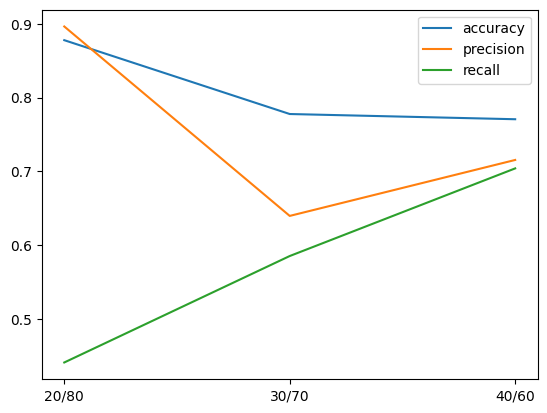

In [161]:
X_plt = ['20/80', '30/70', '40/60']

plt.plot(X_plt, acc, label = 'accuracy')  
plt.plot(X_plt, prec, label = 'precision')   
plt.plot(X_plt, recall, label = 'recall')
plt.legend()

## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

<function matplotlib.pyplot.show(close=None, block=None)>

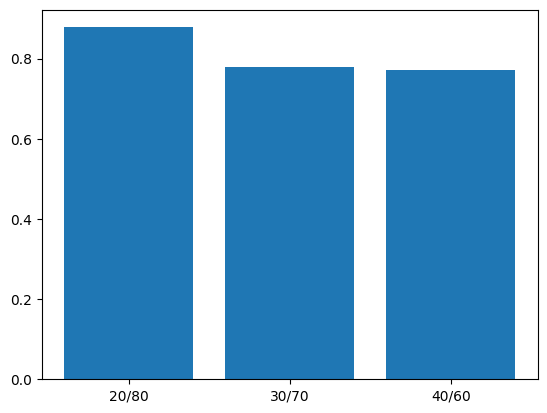

In [162]:
#### write your code
plt.bar(X_plt, acc)
plt.show

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

`In this problem prediction is biased to majority class. Therefore, the accuracy on 20/80 sample is very good. But in this case accuracy is a bad evaluation metric.`